<a href="https://colab.research.google.com/github/e-dania/Afroglot_V1/blob/main/Group_22_Formative_3_Probability_Distributions%2C_Bayesian_Probability%2C_and_Gradient_Descent_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Part 1:Malaria in Burundi

According to health ministry data, a rural clinic in the Ngozi province receives an **average of 6 malaria cases per day**.

Health officials want to estimate the probability of seeing **exactly 10 malaria cases** on a given day to determine whether they should deploy extra health workers.

### Problem:
**If the average malaria rate per day is 6 cases**, what is the probability that **exactly 10** people report malaria on a randomly selected day?


In [ ]:
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

def exp(x, terms=20):
    result = 0
    for n in range(terms):
        result += (x ** n) / factorial(n)
    return result

def poisson_pmf_manual(lmbda, k):
    e_neg_lambda = 1 / exp(lmbda)     # e^(-λ)
    numerator = (lmbda ** k)
    denominator = factorial(k)
    return e_neg_lambda * (numerator / denominator)

lambda_rate = 6
k_value = 10

probability = poisson_pmf_manual(lambda_rate, k_value)

probability


0.04130330737044756

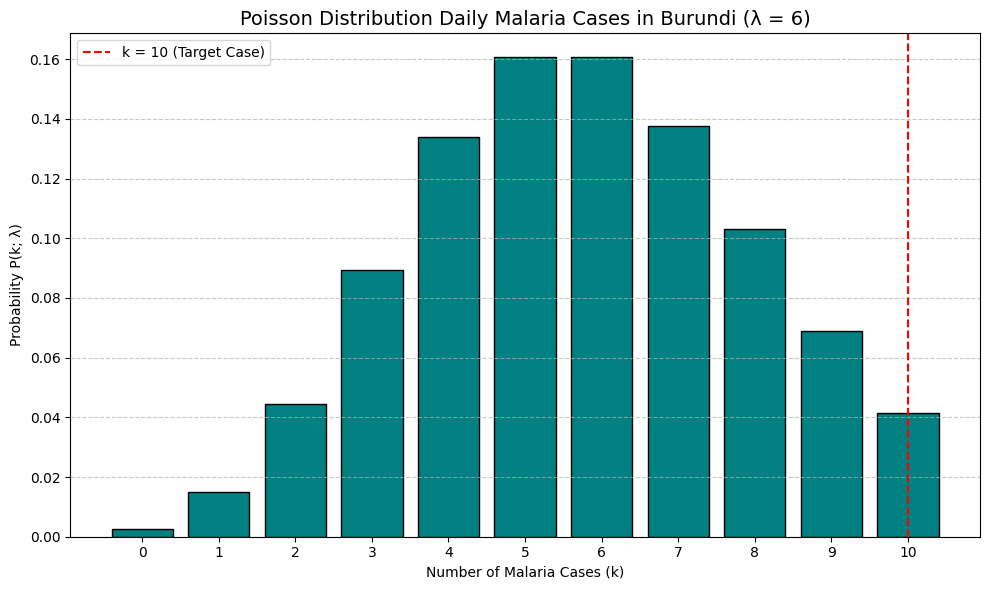

In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(0, k_value+ 1))
pmf_values = [poisson_pmf_manual(lambda_rate, k) for k in k_values]

plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values, color='teal', edgecolor='black')
plt.title("Poisson Distribution Daily Malaria Cases in Burundi (λ = 6)", fontsize=14)
plt.xlabel("Number of Malaria Cases (k)")
plt.ylabel("Probability P(k; λ)")
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=10, color='red', linestyle='--', label="k = 10 (Target Case)")
plt.legend()
plt.tight_layout()
plt.show()

# PART 2: Bayesian Probability

###**Real World Problem**

African Leadership University uses Bayesian probability to predict which students are at risk of failing a course.

Taking into account a student's missing assignments, low quiz scores and class participation, they use these variables to estimate if a student is likely to fail a course

This prompts early intervention — such as academic support or advising — before actual grades decline. As more data is collected (like improved participation), the risk estimate is updated again.

Bayesian Probabiltiy shines here cause it starts with a base failure rate and adjust over time dynamically based on student specific evidence


###**Prior Probability - P(Fail)**

This stands for the initial belief tht a student is going to fail before considering new evidence in the form of missed assignments

Historically, **15%** of all students fail the course.

**P(Fail)** = 0.15


###**Likelihood Values**

These values tell us the probability for a student to miss assignments based on whether they eventually fail or pass.

---------------------------------------------------

**P(Missed | Fail)**

Looking at the students who failed, **90%** missed multiple assignments.
This just shows that missing assignments is common among failing students

**P(Missed | Fail) = 0.90**

---------------------------------------------------------

**P(Missed | Pass)**
Among students who passed, **20%** still missed assignments
Some students who passed still missed assignments

**P(Missed | Pass) = 0.20**

###**Bayes' Theorem**

**P(Fail | Missed) = (P(Missed∣Fail)⋅P(Fail)) / P(Missed)**

We calculate P(Missed) by

**P(Missed) = P(Missed | Fail) ⋅ P(Fail) + P(Missed | Pass) ⋅ P(Pass)**

Where P(Pass) is just the inverse of P(Fail)

 1 - P(Fail) = 1 - 0.15 = 0.85

###**Python Implementation**


In [ ]:
# Step 1: Define prior probabilities
P_fail = 0.15
P_pass = 0.85

# Step 2: Define likelihoods
P_missed_given_fail = 0.90
P_missed_given_pass = 0.20

# Step 3: Compute total probability of missing assignments (normalizer)
P_missed = (P_missed_given_fail * P_fail) + (P_missed_given_pass * P_pass)

# Step 4: Apply Bayes' Theorem to compute posterior
P_fail_given_missed = (P_missed_given_fail * P_fail) / P_missed

# Step 5: Print step-by-step breakdown
print("Step-by-Step Bayes Update:")
print(f"Prior P(Fail): {P_fail}")
print(f"Likelihood P(Missed | Fail): {P_missed_given_fail}")
print(f"Likelihood P(Missed | Pass): {P_missed_given_pass}")
print(f"Marginal Probability P(Missed): {P_missed:.4f}")
print(f"Posterior P(Fail | Missed): {P_fail_given_missed:.4f}")

Step-by-Step Bayes Update:
Prior P(Fail): 0.15
Likelihood P(Missed | Fail): 0.9
Likelihood P(Missed | Pass): 0.2
Marginal Probability P(Missed): 0.3050
Posterior P(Fail | Missed): 0.4426


###**Interpretation**
Even though in total only **15%** of students typically fail, once a student misses multiple assignments, the probability that they would fail jumps to **44.26%**

###**Practical Significance of the Bayesian Inference in this Scenario**


*  **Early Interventions**: Educators can act earlier to support at-risk students using probabilistic signals.
*   **Better Resource Allocation**: Limited tutoring or advising resources can be prioritized for students with higher estimated risk.
*   **Continuous Learning**: Models can be updated with new data from each academic term.

Using Bayesian inference with multiple factors leads to smarter, earlier, fairer, and more adaptive support for students

# PART 4: Gradient Descent in Code


Final Predictions: [3.256 5.936]


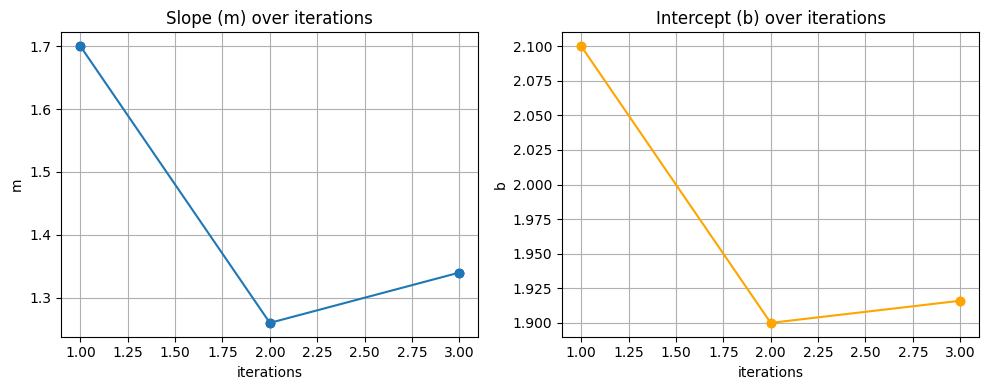

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([1, 3])
Y = np.array([3, 6])

# Initial values
m = -1.0
b = 1.0
lr = 0.1  # learning rate
iterations = 3

# Store values for plotting
m_values = []
b_values = []
errors = []

# Gradient Descent Loop
for epoch in range(iterations):
    Y_pred = m * X + b
    error = np.mean((Y - Y_pred) ** 2)

    # Gradients
    dm = -2 * np.mean((Y - Y_pred) * X)
    db = -2 * np.mean(Y - Y_pred)

    # Update
    m -= lr * dm
    b -= lr * db

    m_values.append(m)
    b_values.append(b)
    errors.append(error)

# Final prediction
Y_final_pred = m * X + b

# Visualization
plt.figure(figsize=(15, 4))

# Plot 1: m over iterations
plt.subplot(1, 3, 1)
plt.plot(range(1, iterations+1), m_values, marker='o', label='m')
plt.scatter(range(1, iterations+1), m_values, color='blue')
plt.title('Slope (m) over iterations')
plt.xlabel('iterations')
plt.ylabel('m')
plt.grid(True)

# Plot 2: b over iterations
plt.subplot(1, 3, 2)
plt.plot(range(1, iterations+1), b_values, marker='o', color='orange', label='b')
plt.scatter(range(1, iterations+1), b_values, color='orange')
plt.title('Intercept (b) over iterations')
plt.xlabel('iterations')
plt.ylabel('b')
plt.grid(True)

plt.tight_layout()
plt.show()
